__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [2]:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end


euler (generic function with 1 method)

In [3]:
f(x,t)=[x[2],-x[1]-x[2]]

f (generic function with 1 method)

In [4]:
clist=0:0.01:35
vece=euler(f,list,[1,0])

listx1=map(x->x[1],vece)
listx2=map(x->x[2],vece)


3501-element Array{Any,1}:
  0         
 -0.01      
 -0.0199    
 -0.0297    
 -0.0394    
 -0.049     
 -0.0585001 
 -0.0679003 
 -0.0772007 
 -0.0864012 
 -0.0955021 
 -0.104503  
 -0.113405  
  ⋮         
  2.90155e-8
  2.8726e-8 
  2.84365e-8
  2.8147e-8 
  2.78576e-8
  2.75683e-8
  2.72791e-8
  2.699e-8  
  2.67011e-8
  2.64123e-8
  2.61238e-8
  2.58356e-8

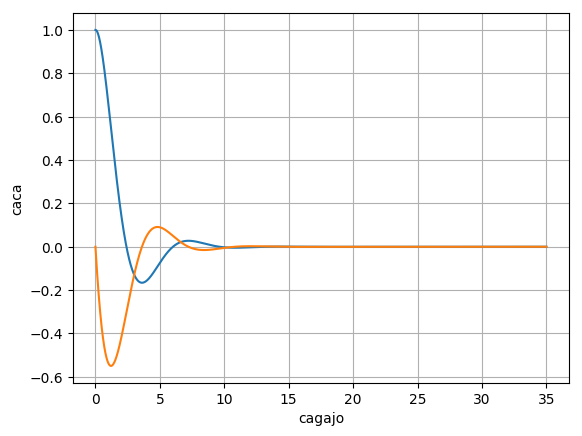

In [5]:
using PyPlot
xlabel("cagajo")
ylabel("caca")
plot(list,listx1)
plot(list,listx2)
grid()

In [6]:
function rungekutta(f,list,x0)  
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t+(h/2))
        k3 = f(x+(h/2)*k2, t+(h/2))
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

rungekutta (generic function with 1 method)

In [7]:
list=0:0.01:35
vecr=rungekutta(f,list,[1,0])

listx1r=map(x->x[1],vecr);
listx2r=map(x->x[2],vecr);


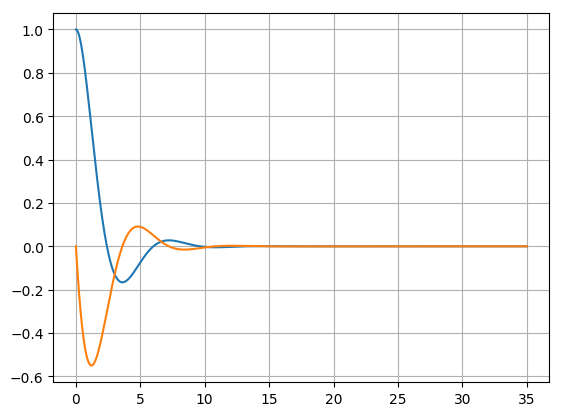

In [8]:
plot(list,listx1)
plot(list,listx2)
grid()

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [ ]:
g(z,t)=[cos(z),sin(z)-]


__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [39]:
function rungekutta2(f,x0,t0,tf,h)  
     
     listx1=t0:h:tf
    listx2=[x0]
    x = x0
    
     for i in 1:length(listx1)-1
        
        k1 = f(x,listx1[i])
        k2 = f(x+(h/2)*k1,listx1[i]+(h/2))
        k3 = f(x+(h/2)*k2, listx1[i]+(h/2))
        k4 = f(x+h*k3, listx1[i]+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx2,x) 
     end
     return listx1,listx2
end

rungekutta2 (generic function with 1 method)

In [40]:
function m(x,t0)
    return (x*x)-1
end
#m(x,t)=(x^2)-1

m (generic function with 2 methods)

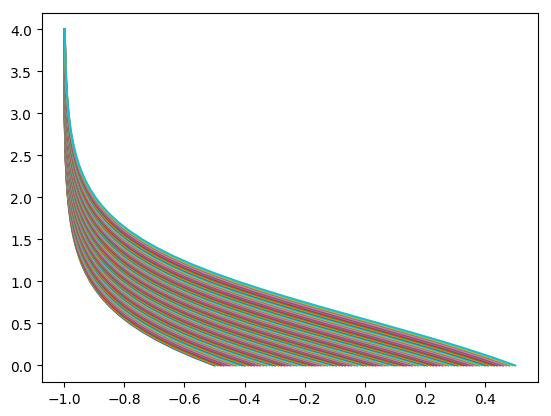

In [47]:
rand=linspace(-0.5,0.5,100)
for i in 1:length(rand)
    r=rungekutta2(m,rand[i],0,4,0.1)
    plot(r[2],r[1])
end

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [50]:
function n(x,t)
    return x^2
end    

n (generic function with 1 method)

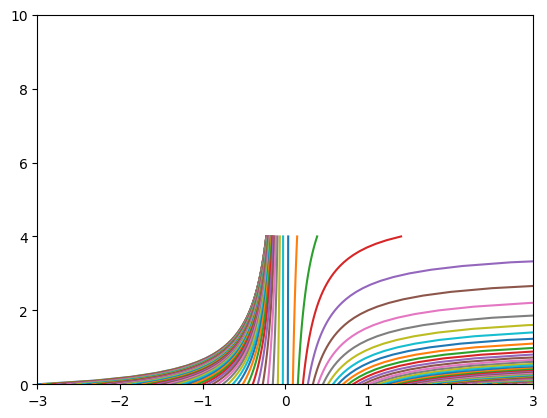

In [57]:
rand2=linspace(-3,3,100)
for i in 1:length(rand2)
    r=rungekutta2(n,rand2[i],0,4,0.1)
    xlim(-3,3)
    ylim(0,10)
    plot(r[2],r[1])
end

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$